# Qatar Real Estate Analysis and Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df= pd.read_csv(r"C:\Users\Admin\Desktop\Qatar Real Estate Analysis and Price Prediction\qatar_real_estate_data.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13430 entries, 0 to 13429
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_of_contract       13430 non-null  object 
 1   municipality_name      13430 non-null  object 
 2   zone_name              13430 non-null  object 
 3   real_estate_type       13430 non-null  object 
 4   area_in_square_meters  13430 non-null  int64  
 5   price_per_square_foot  13430 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 629.7+ KB
None


In [4]:
#checking missing values

print(df.isna().sum())

date_of_contract         0
municipality_name        0
zone_name                0
real_estate_type         0
area_in_square_meters    0
price_per_square_foot    0
dtype: int64


In [5]:
#checking for duplicates

print(df.duplicated().sum())

22


In [6]:
#removing duplicates
df=df.drop_duplicates()

In [7]:
#Forcnfirmation, checking anothertime

print(df.duplicated().sum())

0


In [8]:
df.head()

,date_of_contract,municipality_name,zone_name,real_estate_type,area_in_square_meters,price_per_square_foot
0,2025-03-06,Doha,Al Maamoura 43,Residence,552,404.0
1,2025-03-06,Doha,Al Thumama 50,Vacant Land,780,322.0
2,2025-03-06,Doha,Al Thumama 50,Vacant Land,731,169.0
3,2025-03-06,Doha,Al Thumama 50,Vacant Land,755,169.0
4,2025-03-06,Doha,Al Thumama 50,Vacant Land,661,165.0


# Exploratory Data Analysis(EDA)

In [9]:
#check basic statistics

print(df.describe())

       area_in_square_meters  price_per_square_foot
count           13408.000000           13408.000000
mean             1008.575477             776.269018
std              4000.793305            1429.723179
min                 1.000000              39.781000
25%               437.000000             304.599500
50%               600.000000             418.030000
75%               904.000000             801.575000
max            279660.000000           36951.501155


In [10]:
#check unique values in key columns

print("\nUnique values in Real Estate Type:",df["real_estate_type"].unique())


Unique values in Real Estate Type: ['Residence' 'Vacant Land' 'Residential Unit' 'Residential Building'
 'Apartment Complex' 'Shops' 'Commercial Residential Building and  Shops'
 'Commercial Building' 'Residential Building and  Shops'
 'Residential Building and Shops' 'Residential building'
 'Residential commercial building' 'Hotel Apartments'
 'Administrative building' 'Building Complex' 'Tower'
 'Residential Building and Shop' 'Administrative Building' 'Hotel'
 'Multi-purpose Building' 'Residential Tower' 'Hotel Appartments'
 'Administrative  building' 'Multi-purpose Vacant Land'
 'commercial Building' 'Residential  Tower' 'Building and Shops'
 'Residential Commercial Building and Shops'
 'Commercial and Administrative building'
 'Administrative Building and shops'
 'Administrative and commercial building'
 'Shops and administrative offices'
 'Commercial and administrative building'
 'Commercial and AdministrativeBuilding'
 'Multi-Purpose Commerial Building' 'Palace' 'Building'
 'mm

In [11]:
print("\nUnique Municipalities:",df["municipality_name"].unique())


Unique Municipalities: ['Doha' 'Al Rayyan' 'Al Wakrah']


In [12]:
#check the number of transactions per municipality

print("\ntransactions per municipality :\n",df["municipality_name"].value_counts())


transactions per municipality :
 municipality_name
Doha         6167
Al Rayyan    5142
Al Wakrah    2099
Name: count, dtype: int64


In [13]:
# Check for 0 or unusually small/large values
print(df[df['price_per_square_foot'] < 1000])
print(df[df['area_in_square_meters'] < 10])

      date_of_contract municipality_name       zone_name real_estate_type  \
0           2025-03-06              Doha  Al Maamoura 43        Residence   
1           2025-03-06              Doha   Al Thumama 50      Vacant Land   
2           2025-03-06              Doha   Al Thumama 50      Vacant Land   
3           2025-03-06              Doha   Al Thumama 50      Vacant Land   
4           2025-03-06              Doha   Al Thumama 50      Vacant Land   
...                ...               ...             ...              ...   
13425       2020-02-27         Al Wakrah       Al Wakrah        Residence   
13426       2020-02-25         Al Wakrah       Al Mashaf      Vacant Land   
13427       2020-02-24         Al Wakrah       Al Wakrah        Residence   
13428       2020-02-18         Al Wakrah       Al Wukair        Residence   
13429       2020-01-15         Al Wakrah       Al Wakrah      Vacant Land   

       area_in_square_meters  price_per_square_foot  
0                    

In [14]:
#total price per property

df['total_price'] = df['area_in_square_meters'] * df['price_per_square_foot'] * 10.7639  # 1 sqm = 10.7639 sqft

df['total_price']

0        2.400436e+06
1        2.703461e+06
2        1.329761e+06
3        1.373420e+06
4        1.173965e+06
             ...     
13425    2.999975e+06
13426    1.823448e+03
13427    1.087823e+06
13428    1.499985e+06
13429    1.521988e+06
Name: total_price, Length: 13408, dtype: float64

In [15]:
#Price per square meter

df['price_per_sqm'] = df['price_per_square_foot'] * 10.7639
df['price_per_sqm']

0        4348.615600
1        3465.975800
2        1819.099100
3        1819.099100
4        1776.043500
            ...     
13425    4658.346822
13426    1823.447716
13427    3520.462662
13428    3464.167465
13429    3013.838180
Name: price_per_sqm, Length: 13408, dtype: float64

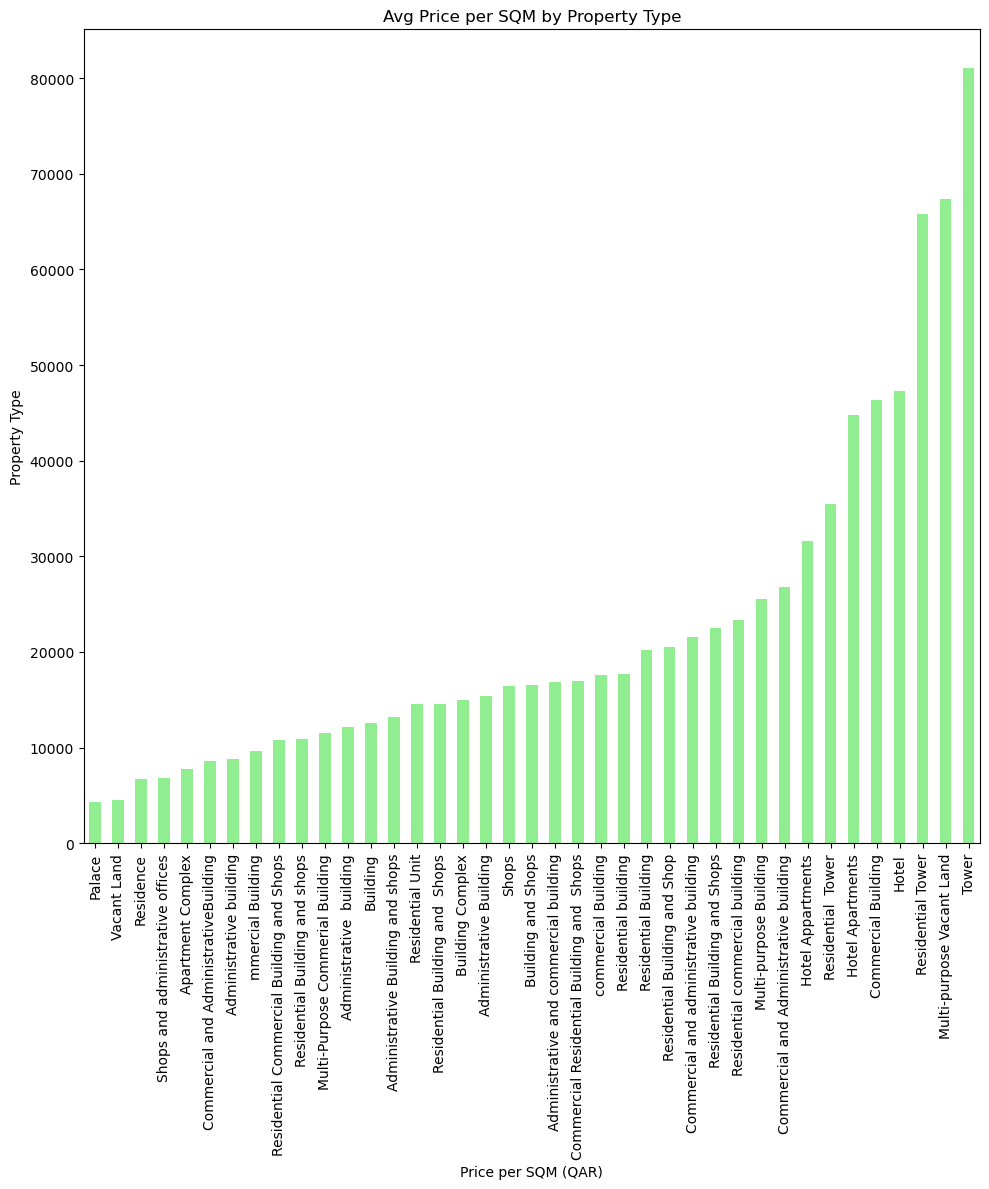

In [16]:
#average price per SQM by property type
df.groupby('real_estate_type')['price_per_sqm'].mean().sort_values().plot(
    kind='bar', figsize=(10, 12), color='lightgreen', title='Avg Price per SQM by Property Type'
)
plt.xlabel("Price per SQM (QAR)")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()



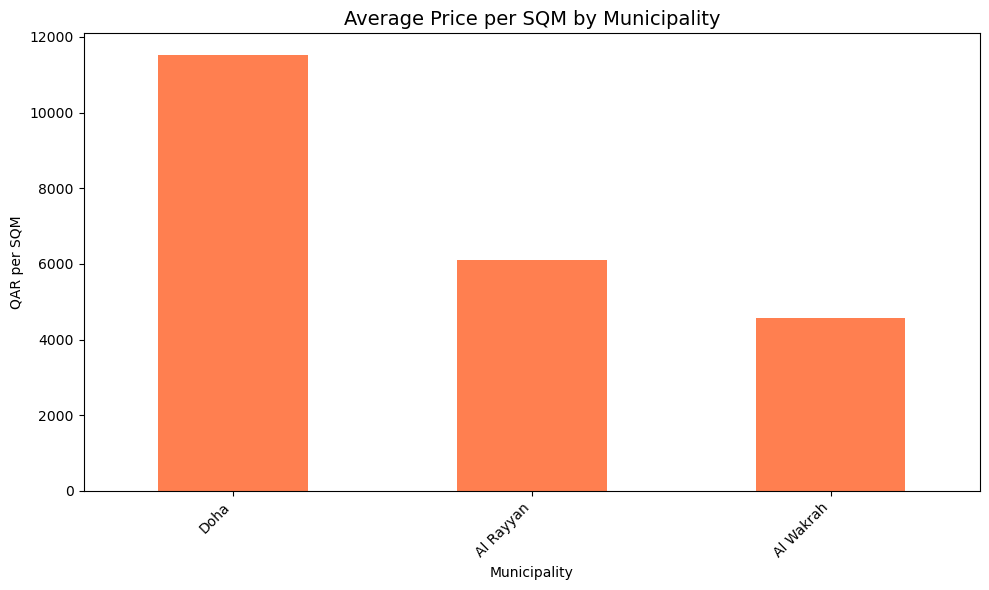

In [17]:
#Average Price per SQM by Municipality

avg_price_muni = df.groupby('municipality_name')['price_per_sqm'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_price_muni.plot(kind='bar', color='coral')
plt.title("Average Price per SQM by Municipality", fontsize=14)
plt.ylabel("QAR per SQM")
plt.xlabel("Municipality")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


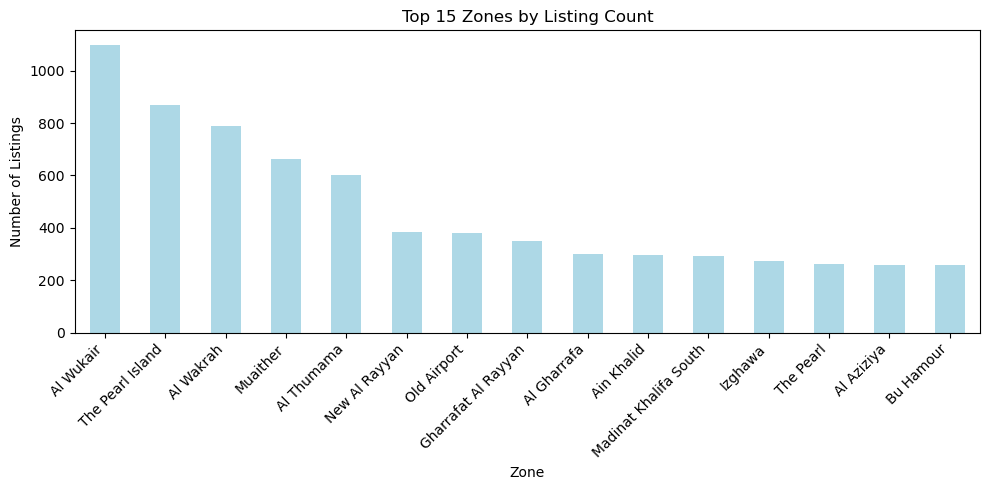

In [18]:
#Listings Count by zone

zone_counts = df['zone_name'].value_counts().head(15)

zone_counts.plot(kind='bar', figsize=(10, 5), color='lightblue')
plt.title("Top 15 Zones by Listing Count")
plt.xlabel("Zone")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


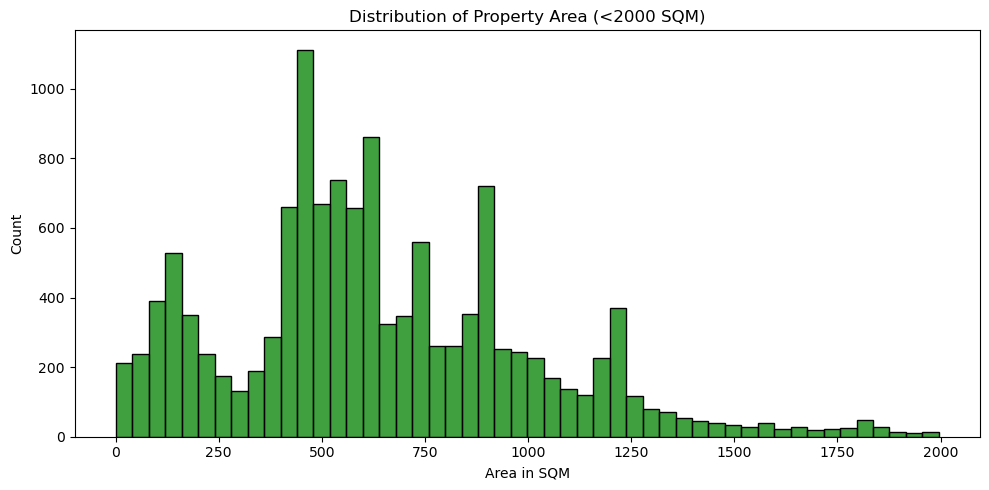

In [19]:
# Area Distribution 

# Filter for properties with area < 2000 sqm
df_filtered = df[df['area_in_square_meters'] < 2000]

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['area_in_square_meters'], bins=50, color='green')
plt.title("Distribution of Property Area (<2000 SQM)")
plt.xlabel("Area in SQM")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



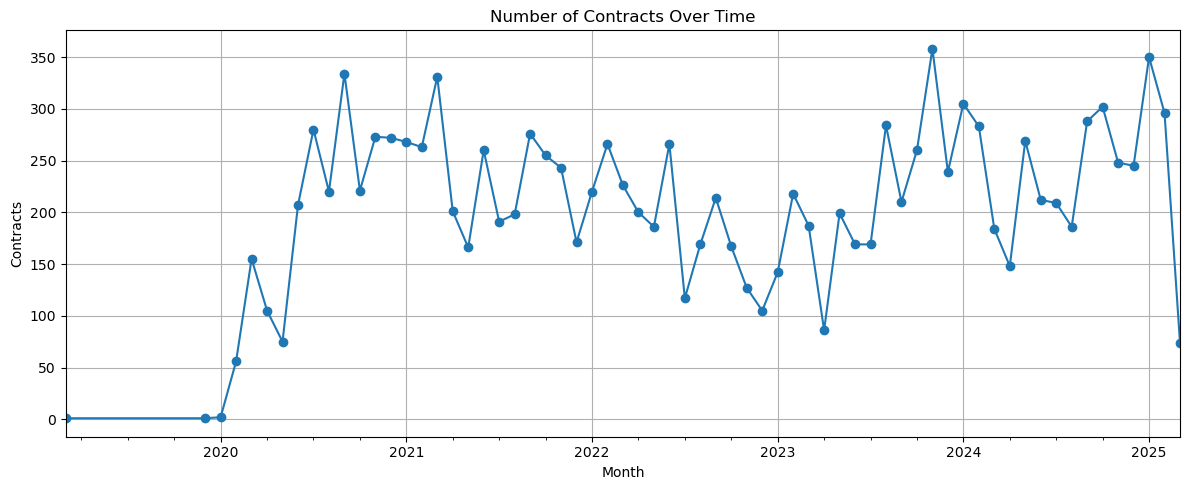

In [20]:
#Contract Volume Over Time

df['date_of_contract'] = pd.to_datetime(df['date_of_contract'])

monthly_counts = df['date_of_contract'].dt.to_period("M").value_counts().sort_index()
monthly_counts.plot(kind='line', marker='o', figsize=(12, 5))
plt.title("Number of Contracts Over Time")
plt.xlabel("Month")
plt.ylabel("Contracts")
plt.grid(True)
plt.tight_layout()
plt.show()



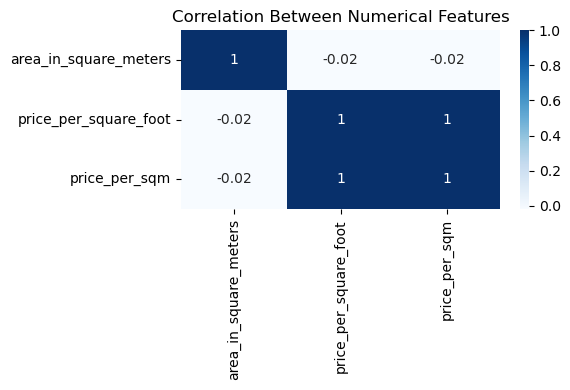

In [21]:
#Heatmap of Correlations

import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df[['area_in_square_meters', 'price_per_square_foot', 'price_per_sqm']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


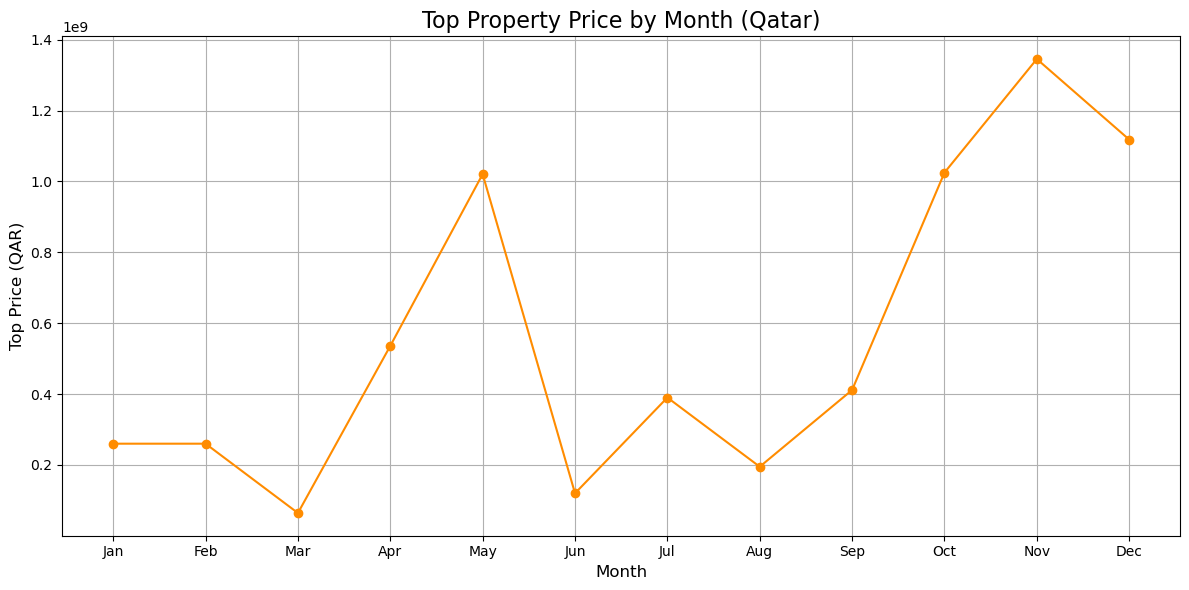

In [22]:
df['date_of_contract'] = pd.to_datetime(df['date_of_contract'])
df['year_month'] = df['date_of_contract'].dt.to_period('M').astype(str)
top_monthly_prices = df.loc[df.groupby('year_month')['total_price'].idxmax()]
import pandas as pd
import matplotlib.pyplot as plt

# Make sure your date column is datetime
df['date_of_contract'] = pd.to_datetime(df['date_of_contract'])

# Extract numeric month and name (e.g., 1 -> Jan)
df['month'] = df['date_of_contract'].dt.month
df['month_name'] = df['date_of_contract'].dt.strftime('%b')  # Jan, Feb, etc.

# Get the top price for each month (grouping by month number for correct order)
top_prices = df.loc[df.groupby('month')['total_price'].idxmax()]

# Sort by month number
top_prices = top_prices.sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(top_prices['month_name'], top_prices['total_price'], marker='o', color='darkorange')

plt.title('Top Property Price by Month (Qatar)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Top Price (QAR)', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()



In [23]:
!pip install prophet

12:33:23 - cmdstanpy - INFO - Chain [1] start processing
12:33:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Admin\AppData\Local\Temp\ipykernel_7492\2401003632.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


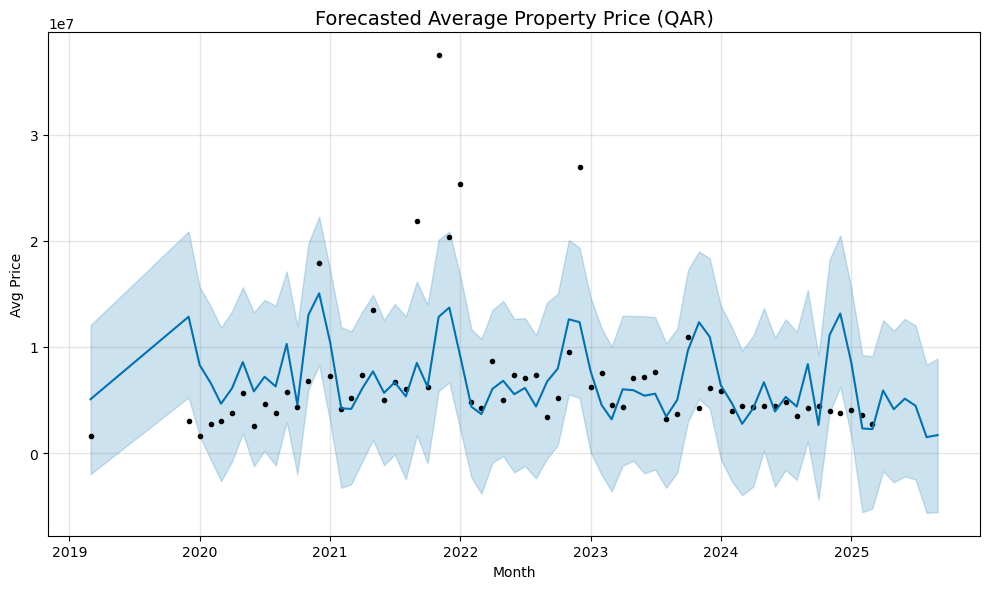

In [24]:
from prophet import Prophet
#Forecasting

# Step 1: Convert date and calculate monthly average price
df['date_of_contract'] = pd.to_datetime(df['date_of_contract'])
df['year_month'] = df['date_of_contract'].dt.to_period('M').astype(str)

monthly_avg = df.groupby('year_month')['total_price'].mean().reset_index()
monthly_avg['ds'] = pd.to_datetime(monthly_avg['year_month'])
monthly_avg.rename(columns={'total_price': 'y'}, inplace=True)

# Step 2: Fit the Prophet model
model = Prophet()
model.fit(monthly_avg[['ds', 'y']])

# Step 3: Create future dataframe (e.g., next 6 months)
future = model.make_future_dataframe(periods=6, freq='M')  # change 6 to 12 if needed

# Step 4: Forecast
forecast = model.predict(future)

# Step 5: Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Average Property Price (QAR)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg Price')
plt.grid(True)
plt.tight_layout()
plt.show()


# Price Prediction

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score



In [26]:
#filter out very large outliers for better prediction

df_filtered = df[df['area_in_square_meters'] < 10000]
df_filtered

,date_of_contract,municipality_name,zone_name,real_estate_type,area_in_square_meters,price_per_square_foot,total_price,price_per_sqm,year_month,month,month_name
0,2025-03-06,Doha,Al Maamoura 43,Residence,552,404.000,2.400436e+06,4348.615600,2025-03,3,Mar
1,2025-03-06,Doha,Al Thumama 50,Vacant Land,780,322.000,2.703461e+06,3465.975800,2025-03,3,Mar
2,2025-03-06,Doha,Al Thumama 50,Vacant Land,731,169.000,1.329761e+06,1819.099100,2025-03,3,Mar
3,2025-03-06,Doha,Al Thumama 50,Vacant Land,755,169.000,1.373420e+06,1819.099100,2025-03,3,Mar
4,2025-03-06,Doha,Al Thumama 50,Vacant Land,661,165.000,1.173965e+06,1776.043500,2025-03,3,Mar
...,...,...,...,...,...,...,...,...,...,...,...
13425,2020-02-27,Al Wakrah,Al Wakrah,Residence,644,432.775,2.999975e+06,4658.346822,2020-02,2,Feb
13426,2020-02-25,Al Wakrah,Al Mashaf,Vacant Land,1,169.404,1.823448e+03,1823.447716,2020-02,2,Feb
13427,2020-02-24,Al Wakrah,Al Wakrah,Residence,309,327.062,1.087823e+06,3520.462662,2020-02,2,Feb
13428,2020-02-18,Al Wakrah,Al Wukair,Residence,433,321.832,1.499985e+06,3464.167465,2020-02,2,Feb


In [27]:
# Step 1: Select features and target
features = ['real_estate_type', 'municipality_name', 'area_in_square_meters']
target = 'price_per_square_foot'

X = df_filtered[features]
y = df_filtered[target]

In [28]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 3: Preprocessing pipeline
categorical_features = ['real_estate_type', 'municipality_name']
numerical_features = ['area_in_square_meters']

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

In [30]:
# Step 4: Define pipeline with RandomForest
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [31]:
# Step 5: Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['real_estate_type',
                                                   'municipality_name'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [32]:
# Step 6: Evaluate performance
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (QAR): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (QAR): 393.55
R² Score: -0.1930


In [33]:
# Add prediction column to your filtered dataset

df_filtered = df[df['area_in_square_meters'] < 10000].copy()
df_filtered['predicted_price_per_sqm'] = model_pipeline.predict(df_filtered[features])
df_filtered['predicted_price_per_sqm']

0         714.327309
1        1021.615827
2         182.797456
3         191.636067
4         434.348483
            ...     
13425     349.675344
13426     219.274720
13427     382.402565
13428     439.565965
13429     273.628020
Name: predicted_price_per_sqm, Length: 13306, dtype: float64

In [34]:
# First, make sure df_filtered includes predictions
df_filtered['predicted_price_per_sqm'] = model_pipeline.predict(df_filtered[features])

# Optional: add total predicted price
df_filtered['predicted_total_price'] = df_filtered['predicted_price_per_sqm'] * df_filtered['area_in_square_meters']

# Save to CSV in the same folder
df_filtered.to_csv(r"C:\Users\Admin\Desktop\Qatar Real Estate Analysis and Price Prediction\qatar_real_estate_with_predictions.csv", index=False)

print("✅ File saved successfully.")


✅ File saved successfully.


In [36]:
# Manual inputs with examples shown in brackets
municipality = input("Enter municipality name (e.g., Doha, Al Rayyan,Al Wakrah): ")
zone = input("Enter zone name (e.g., Al Thumama 50, Najma, The Pearl Island): ")
property_type = input("Enter real estate type (e.g., Vacant Land, Residence, Residential Unit): ")
area = float(input("Enter area in square meters (e.g., 300, 500, 1000): "))

# Create DataFrame with all necessary features
input_data = pd.DataFrame({
    'municipality_name': [municipality],
    'zone_name': [zone],
    'real_estate_type': [property_type],
    'area_in_square_meters': [area]
})

# Predict price per square meter
predicted_price_per_sqm = model_pipeline.predict(input_data)[0]

# Calculate total price
predicted_total_price = predicted_price_per_sqm * area

# Display result
print("\n📍 Prediction Summary:")
print(f"Municipality: {municipality}")
print(f"Zone: {zone}")
print(f"Property Type: {property_type}")
print(f"Area: {area} sqm")
print(f"💰 Predicted Price/SQM: {predicted_price_per_sqm:.2f} QAR")
print(f"💵 Total Predicted Price: {predicted_total_price:.2f} QAR")


Enter municipality name (e.g., Doha, Al Rayyan,Al Wakrah): Al Wakrah
Enter zone name (e.g., Al Thumama 50, Najma, The Pearl Island):  Al Thumama 50
Enter real estate type (e.g., Vacant Land, Residence, Residential Unit):  Residence
Enter area in square meters (e.g., 300, 500, 1000):  300

📍 Prediction Summary:
Municipality: Al Wakrah
Zone:  Al Thumama 50
Property Type:  Residence
Area: 300.0 sqm
💰 Predicted Price/SQM: 900.73 QAR
💵 Total Predicted Price: 270218.35 QAR
